Moises Quiroz Diaz

G3

# Expansiones Basales - GAMs

### Descripción de la actividad

Una aplicación interesante de los modelos predictivos es poder predecir propiedades de
materiales compuestos a partir de diferentes combinaciones en el proceso y creación de
estos. 

Para esta actividad trabajaremos con un dataset que contiene diferentes medidas de
materiales con los que se hace la mezcla de concreto.

Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas
compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la
superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las
medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM.


## Desafío 1: Preparación del Ambiente de Trabajo

Importe los módulos clásicos del trabajo en ciencia de datos.

El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere
estadísticas descriptivas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pygam
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(14,8)
plt.style.use('seaborn')

In [2]:
from pygam.utils import generate_X_grid

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Desafío 2: Descripción

El vector objetivo tiene el nombre de Concrete compressive strength (MPa,megapascals) .

Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .

Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución.
Decida si es necesario normalizarlos/escalarlos.

In [6]:
df.columns =['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete_compressive_strength']
df.head()


,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast_Furnace_Slag               1030 non-null float64
Fly_Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse Aggregate                 1030 non-null float64
Fine Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


###### Se normalizara, para evitar que el modelo se vea sesgado por alguna variable de que su valor varie mucho del resto, por ejemplo Superplasticize que tiene valores menores

## Desafío 3: Modelo

En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a
ésto, importe las métricas de desempeño asociadas.

Genere conjuntos de entrenamiento y validación.

Genere un primer modelo sin implementar la función gridsearch. Repórte el
hiperparámetro lam así como las métricas de desempeño asociadas.

Genere un segundo modelo implementando gridsearch en lambda con un logspace entre
-3 y 3. 

Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [8]:
y_objetivo = df.pop('Concrete_compressive_strength')

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


In [10]:
X_train , X_test, y_train, y_test = train_test_split(df_scaled,y_objetivo,test_size=.33,random_state= 123)

In [11]:
gam = pygam.LinearGAM().fit(X_train,y_train)

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [12]:
print('El valor de lambda es:',gam.lam)
print('El valor correspondiente al error absoluto medio:',mean_absolute_error(y_test,gam.predict(X_test)))
print('El valor MSE es:',mean_squared_error(y_test,gam.predict(X_test)))
print('El valor r2 para rigde es:',r2_score(y_test,gam.predict(X_test)))

El valor de lambda es: 0.6
El valor correspondiente al error absoluto medio: 4.190267660390915
El valor MSE es: 28.23452981325539
El valor r2 para rigde es: 0.8928203796975891


##### Modelo2 

In [13]:
param_grids = {'lam':np.logspace(-3,3,11)}

In [14]:
gam2 = pygam.LinearGAM().gridsearch(X_train,y_train,**param_grids)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00

In [15]:
print('El valor de lambda es:',gam2.lam)
print('El valor correspondiente al error absoluto medio:',mean_absolute_error(y_test,gam2.predict(X_test)))
print('El valor MSE es:',mean_squared_error(y_test,gam2.predict(X_test)))
print('El valor r2 para rigde es:',r2_score(y_test,gam2.predict(X_test)))

El valor de lambda es: 0.25118864315095796
El valor correspondiente al error absoluto medio: 4.188462906042589
El valor MSE es: 28.344095825148543
El valor r2 para rigde es: 0.8924044618965693


In [16]:
modelo2 =[gam2.lam,mean_absolute_error(y_test,gam2.predict(X_test)),mean_squared_error(y_test,gam2.predict(X_test)),r2_score(y_test,gam2.predict(X_test))]
modelo1 =[gam.lam,mean_absolute_error(y_test,gam.predict(X_test)),mean_squared_error(y_test,gam.predict(X_test)),r2_score(y_test,gam.predict(X_test))]


comparacion = {'Modelo 1': modelo1,'Modelo 2':modelo2}
comparacion= pd.DataFrame(comparacion)
comparacion.index=['Lambda','Error absosulo medio','Error cuadratico medio','R2']
comparacion

,Modelo 1,Modelo 2
Lambda,0.600000,0.251189
Error absosulo medio,4.190268,4.188463
Error cuadratico medio,28.234530,28.344096
R2,0.892820,0.892404


Se observa que ambos modelos tienen un rendimiento similar, donde el modelo2 tiene un desempeño un poco menor, esto se puede deber a que este al ser el mejor modelo, tiene mayor capacidad de generalizacion

## Desafío 4: Dependencia Parcial

En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada
atributo.

Para ello, genere una función que tenga como argumento de entrada el modelo estimado y
devuelva una grilla con todos los gráficos de dependencia parcial.

Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de
resistencia.

In [19]:
def grilla_de_graficos(modelo):
    plt.figure(figsize=(20,10))
    x_grid = generate_X_grid(modelo)
    atributos = df_scaled.columns
    cols=4; row = int(len(atributos)/cols)
    for i, n in enumerate(range(len(atributos))):
        plt.subplot(row, cols, i+1)
        partial_dep, confidence_intervals = modelo.partial_dependence(x_grid, feature=i+1, width=0.95)
        plt.plot(x_grid[:,n], partial_dep, color="blue")
        plt.fill_between(x_grid[:,n], confidence_intervals[0][:,0], confidence_intervals[0][:,1], color="cyan", alpha=.3)
        plt.title(atributos[n])
        plt.scatter(df_scaled.iloc[:,n], [plt.ylim()[0]]*len(df_scaled.iloc[:,n]), marker="|", alpha=1)
    plt.tight_layout()

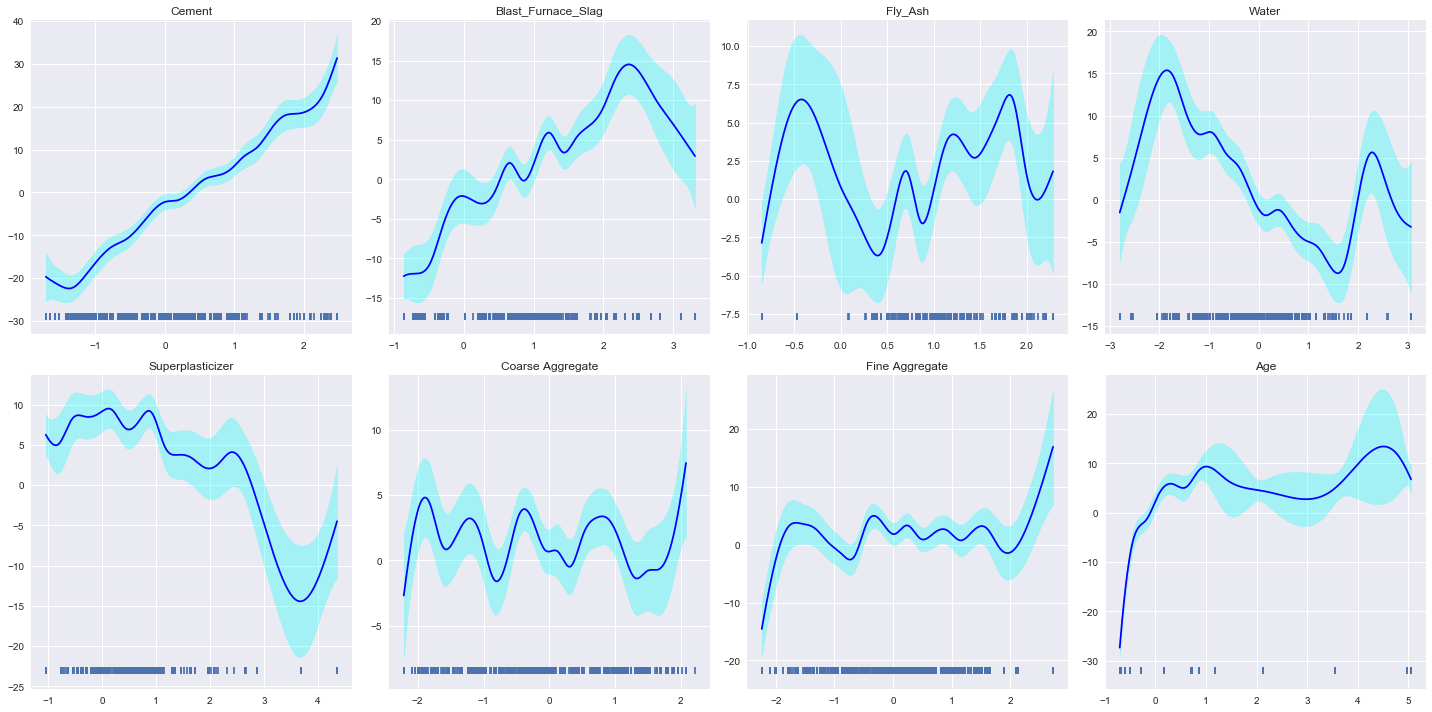

In [20]:
grilla_de_graficos(gam2)

Desde los graficos se observa que existen atributos que poseen un sesgo en la concentracion de datos, por ejemplo 'superplastizer', donde la mayor parte de datos se concentra en los datos menores, se podria decir que 'Cement' es el atributo al que mejor se a ajustado el modelo predictivo

Los mayores niveles de resistencia se observan en:

    cement
    whater
    ellas_fumace_slag
    
mientas que los valores mas bajos se observaron en:
    
    age
    cement
    superplasticer
    fine aggregate
    
